In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
dataset_location = "/content/drive/MyDrive/spam.csv"

**IMPORTED LIBRARIES**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

**READING THE DATASET**

In [22]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**PRE-PROCESSING THE DATSET**

In [23]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [27]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

**CREATE  MODEL AND ADD LAYER**

In [28]:
inputs = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dropout(0.5)(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
model = Model(inputs=inputs,outputs=layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129 

**COMPILE THE MODEL**

In [29]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

**FIT THE MODEL**

In [30]:
history = model.fit(sequences_matrix,Y_train,batch_size=0,epochs=10,
          validation_split=0.2)

Epoch 1/10
112/112 [==============================] - 26s 212ms/step - loss: 0.2085 - accuracy: 0.9358 - val_loss: 0.0807 - val_accuracy: 0.9753
Epoch 2/10
112/112 [==============================] - 23s 207ms/step - loss: 0.0416 - accuracy: 0.9885 - val_loss: 0.0788 - val_accuracy: 0.9809
Epoch 3/10
112/112 [==============================] - 25s 224ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.0854 - val_accuracy: 0.9787
Epoch 4/10
112/112 [==============================] - 25s 224ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.0851 - val_accuracy: 0.9753
Epoch 5/10
112/112 [==============================] - 23s 208ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.1085 - val_accuracy: 0.9765
Epoch 6/10
112/112 [==============================] - 23s 208ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.1711 - val_accuracy: 0.9753
Epoch 7/10
112/112 [==============================] - 23s 208ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.1585 - val_ac

In [31]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

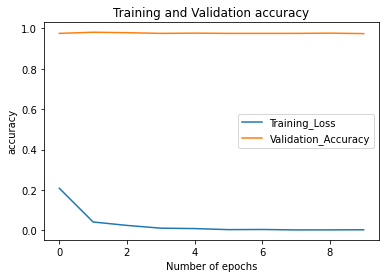

In [32]:
plot_graphs1('Training_Loss', 'Validation_Accuracy', 'accuracy')

**SAVE THE MODEL**

In [33]:
model.save('Spam_sms_classifier.h5')

In [34]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

**TEST THE MODEL**

In [35]:
accuracy1 = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 2s 70ms/step - loss: 0.0943 - accuracy: 0.9830


In [36]:
print(' Accuracy: {:0.3f}'.format(accuracy1[0],accuracy1[1]))

 Accuracy: 0.094
